In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import sys
sys.path.append('/content/drive/My Drive/amal')
import torch
from torch.utils.data import DataLoader,Subset
from textloader import TextDataset,CONTENU,pad_collate_fn,TAILLE_VOCA,PAD_IX,EOS_IX
from generate import generate_beam,generate,generate_beam_nucleus
from utils import maskedCrossEntropy,get_y
from modules import Embedder_RNN , LSTM , GRU
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< LOADING DATA <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

TAILLE_DATASET = 1000
ds = TextDataset(CONTENU)
subset_indices = torch.randint(1,1000,(TAILLE_DATASET,))
ds = Subset(ds, subset_indices)
loader = DataLoader(ds, collate_fn=pad_collate_fn, batch_size=32)

In [4]:
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

# LSTM

In [16]:

# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< LSTM TEST <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

dim_in = TAILLE_VOCA
dim_lat = 60
dim_out = TAILLE_VOCA
lstm = LSTM(dim_in,dim_lat,dim_out)
embedder_lstm = Embedder_RNN(TAILLE_VOCA+1,TAILLE_VOCA,lstm)
embedder_lstm = embedder_lstm.to(device)


LEARNING_RATE = 1e-1
EPOCHS = 50
optimizer = torch.optim.Adam(params=embedder_lstm.parameters() ,lr=LEARNING_RATE)


losses_lstm = []
for epoch in tqdm(range(EPOCHS)):
    temp_loss = []
    for x in loader:

        x = x.to(device)
        optimizer.zero_grad()

        # dans y il y'aura la meme sequence que x mais decalé d'un caractere
        y = get_y(x)
        xhat = embedder_lstm.embed(x)
        h,liste_h,c,liste_c = embedder_lstm(x)
        output_decoded = embedder_lstm.decode(liste_h)
        loss = maskedCrossEntropy(output_decoded,y,padcar=PAD_IX)

        loss.backward()
        optimizer.step()

        #with torch.no_grad():
        temp_loss.append(loss.item())

    losses_lstm.append(np.mean(temp_loss))

100%|██████████| 50/50 [07:34<00:00,  9.09s/it]


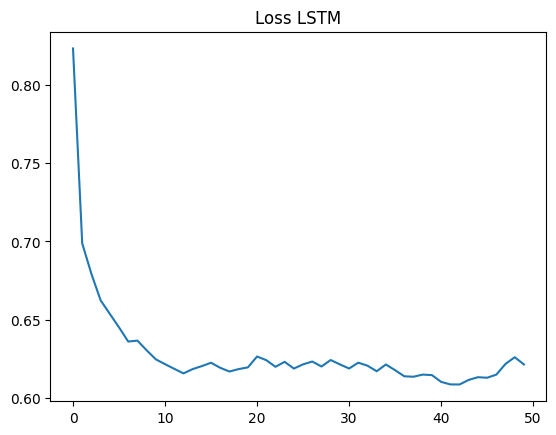

In [17]:
plt.plot(range(EPOCHS) , losses_lstm)
plt.title("Loss LSTM")
plt.show()

In [19]:
print("Simple generation : ")

for _ in range(10):
  sentence_generated = generate(embedder_lstm,EOS_IX, start="There is ", maxlen=200)
  print(sentence_generated)
  print()

Simple generation : 
Generation of 21 caracteres from <There is > 
There is off 2Hnmste doin awha.<EOS>

Generation of 9 caracteres from <There is > 
There is sston ant.<EOS>

Generation of 63 caracteres from <There is > 
There is of tas prcybody you hister vorden Eatild, "In tedg ylorommp ece.<EOS>

Generation of 80 caracteres from <There is > 
There is astenend wor jr withe so, I wayoff therobeor aiter: Unitarst etad Sthe fore fore.<EOS>

Generation of 15 caracteres from <There is > 
There is of kes tserause.<EOS>

Generation of 38 caracteres from <There is > 
There is of avee of the morte ther-Trout thorde.<EOS>

Generation of 10 caracteres from <There is > 
There is hate: Sire.<EOS>

Generation of 18 caracteres from <There is > 
There is our to to ckse ste.<EOS>

Generation of 8 caracteres from <There is > 
There is fror jan.<EOS>

Generation of 7 caracteres from <There is > 
There is to now?.<EOS>



# GRU

In [20]:
dim_in = TAILLE_VOCA
dim_lat = 60
dim_out = TAILLE_VOCA
gru = GRU(dim_in,dim_lat,dim_out)
embedder_gru = Embedder_RNN(TAILLE_VOCA+1,TAILLE_VOCA,gru)
embedder_gru.to(device)


LEARNING_RATE = 1e-1
EPOCHS = 50
optimizer = torch.optim.Adam(params=embedder_gru.parameters() ,lr=LEARNING_RATE)


losses_gru = []
for epoch in tqdm(range(EPOCHS)):
    temp_loss = []
    for x in loader:

        optimizer.zero_grad()
        x = x.to(device)

        # dans y il y'aura la meme sequence que x mais decalé d'un caractere
        y = get_y(x)
        xhat = embedder_gru.embed(x)
        h,liste_h = embedder_gru(x)
        output_decoded = embedder_gru.decode(liste_h)
        loss = maskedCrossEntropy(output_decoded,y,padcar=PAD_IX)

        loss.backward()
        optimizer.step()


        with torch.no_grad():
            temp_loss.append(loss.item())

    losses_gru.append(np.mean(temp_loss))

100%|██████████| 50/50 [06:37<00:00,  7.94s/it]


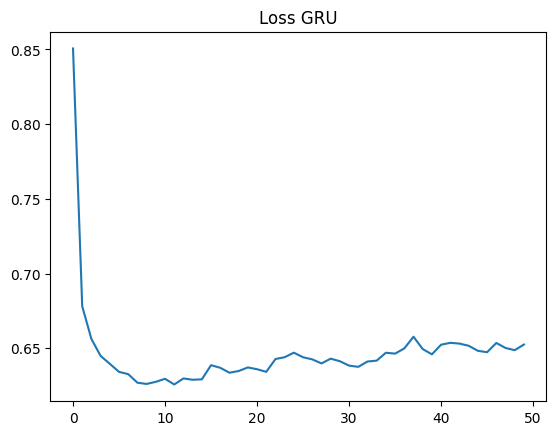

In [21]:
plt.plot(range(EPOCHS) , losses_gru)
plt.title("Loss GRU")
plt.show()

In [22]:
print("Simple generation : ")

for _ in range(10):
  sentence_generated_gru = generate(embedder_gru,EOS_IX, start="There is ", maxlen=200)
  print(sentence_generated_gru)
  print()

Simple generation : 
Generation of 5 caracteres from <There is > 
There is Ifraq.<EOS>

Generation of 66 caracteres from <There is > 
There is deallyitel cat reberecagre guon ghappliod lot we al gefutidn masle.<EOS>

Generation of 200 caracteres from <There is > 
There is evas pes mie bener repes un to my ran Irant Al ign ISISISISISIranat to to now havernoiter off the Uof, the Uing  sap of pare we bing silwilild e po, ist un Menert hao xpelud in can caw evene Mexr rougra

Generation of 52 caracteres from <There is > 
There is now wort not me  saies reprist fid we  hinier I maby.<EOS>

Generation of 200 caracteres from <There is > 
There is whe it, a to leabs bin s it me we me loot of of ut hoend ister cit lown I latrin,y itony gower wotut nee Unowtatran be of af toy's reall o Eaym miend e don't peoban gof ifrading to are luto I fill csid,

Generation of 200 caracteres from <There is > 
There is isd nown'mempr a se m ute to its the Uoun in nowifraq I arut al're we now pomest blaus on Fe